In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv("noisy_curvefit_data.csv")

In [3]:
df.shape

(100, 6)

In [4]:
#4b) There are 100 rows and 6 columns
df.head()

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
0,-1.000000,11.624419,8.296963,12.201067,7.811725,3.155566
1,-0.929293,10.377466,9.674440,12.198084,8.275006,7.518855
2,-0.858586,10.585100,9.251983,13.186565,12.926586,9.963630
3,-0.787879,10.913928,7.786344,12.552304,11.832379,9.625801
4,-0.717172,8.640287,8.551869,4.741432,8.790834,6.624113


In [5]:
df.tail()

,x,y_noise_1,y_noise_2,y_noise_3,y_noise_4,y_noise_5
95,5.717172,-1.411918,0.822231,-2.027132,-1.825106,2.746147
96,5.787879,0.344879,-1.718956,2.747559,-6.803779,-5.137472
97,5.858586,0.307133,0.353528,0.967976,5.461567,-0.905616
98,5.929293,0.048657,0.159961,2.482130,-0.414616,-4.334548
99,6.000000,-0.193438,-2.244792,1.930035,4.992414,-6.872850


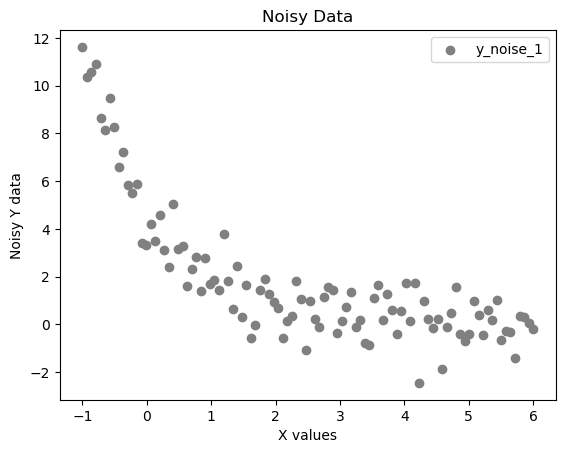

In [6]:
#4d) The column names are: x, y_noise_1, y_noise_2, y_noise_3, y_noise_4, y_noise_5
plt.scatter(x="x", y="y_noise_1", c="grey", data=df)
plt.title("Noisy Data")
plt.xlabel("X values")
plt.ylabel("Noisy Y data")
plt.legend()
plt.show()

In [7]:
def model(x, A, k):
    return A * np.exp(-k * x)
p0 = [1, 1]
popt, pcov = curve_fit(model, df["x"], df["y_noise_1"], p0=p0)
A_fit, k_fit = popt
print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")
residuals = df["y_noise_1"] - model(df["x"], A_fit, k_fit)
chi2 = np.sum(residuals**2)
dof = len(df["x"]) - len(popt)
chi2_reduced = chi2 / dof
print(chi2_reduced)
A_fit_list = [A_fit]
k_fit_list = [k_fit]
chi_2_list = [chi2_reduced]

Fit: y = 4.71 * e^(-0.92 * x)
0.7906732087457324


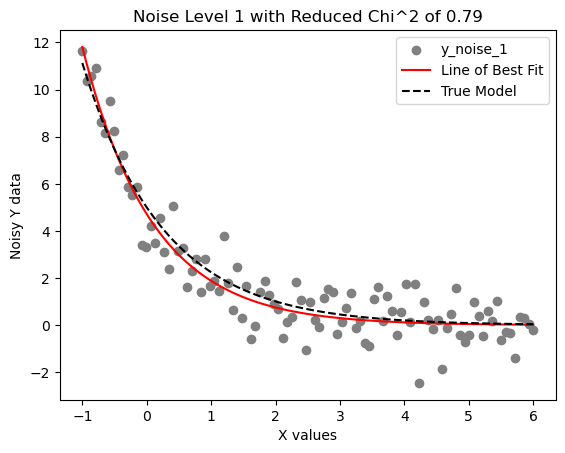

In [8]:
plt.scatter(x=df["x"], y="y_noise_1", c="grey", data=df)
plt.plot(df["x"], model(df["x"], A_fit, k_fit), c="red", label="Line of Best Fit")
plt.plot(df["x"], model(df["x"], 5, 0.8), c="black", label="True Model", linestyle="--")
plt.title("Noise Level 1 with Reduced Chi^2 of 0.79")
plt.xlabel("X values")
plt.ylabel("Noisy Y data")
plt.legend()
plt.show()

In [9]:
def fit_model(x, y):
    def model(x, A, k):
        return A * np.exp(-k * x)
    p0 = [1, 1]
    popt, pcov = curve_fit(model, df["x"], y, p0=p0)
    A_fit, k_fit = popt
    residuals = y - model(df["x"], A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(df["x"]) - len(popt)
    chi2_reduced = chi2 / dof
    return A_fit, k_fit, chi2_reduced

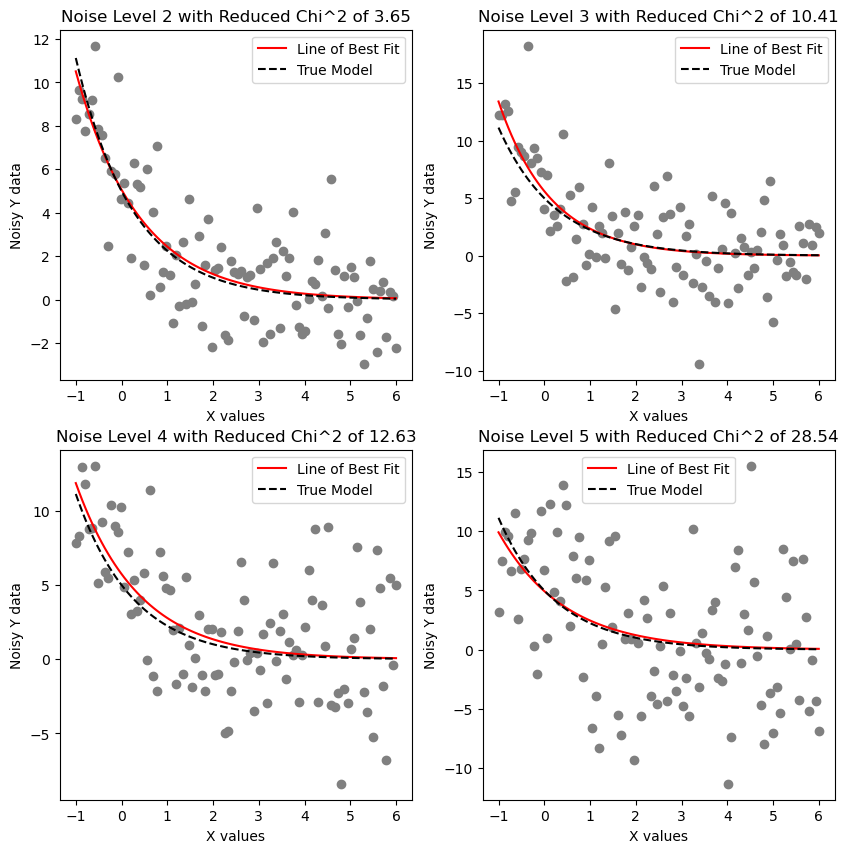

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
i = 0
j = 0
def model(x, A, k):
    return A * np.exp(-k * x)
for index, item in enumerate(df.columns[2:], start = 2):
    y = df[item]
    A_fit, k_fit, chi2_reduced = fit_model(df["x"], y)
    A_fit_list.append(A_fit)
    k_fit_list.append(k_fit)
    chi_2_list.append(chi2_reduced)
    axes[i,j].scatter(x=df["x"], y=y, c="grey")
    axes[i,j].plot(df["x"], model(df["x"], A_fit, k_fit), c="red", label="Line of Best Fit")
    axes[i,j].plot(df["x"], model(df["x"], 5, 0.8), c="black", label="True Model", linestyle="--")
    axes[i,j].set_title(f"Noise Level {index} with Reduced Chi^2 of {chi2_reduced:.2f}")
    axes[i,j].set_xlabel("X values")
    axes[i,j].set_ylabel("Noisy Y data")
    axes[i,j].legend()
    if i==j and i==0:
        j += 1
    elif i<j and i==0:
        i += 1
        j -= 1
    else:
        j += 1
plt.show()

In [11]:
#4a) When the noise level increased, the lines of best fit represented less of the data
#4b) As the data became more and more spread apart and noisy, the reduced chi squared got farther from 1. 

In [12]:
df2 = pd.DataFrame()
df2["Noise Level"] = [1, 2, 3, 4, 5]
df2["A fit"] = A_fit_list
df2["k fit"] = k_fit_list
df2["Reduced chi-squared"] = chi_2_list

In [13]:
df2.to_csv("noisy_parameters.csv", index=False)